# **Uber: Maximising Revenue per Driver Hour (RDH) through Demand Optimisation**


## **Business Problem Overview**

---



### **Optimizing Uber's Revenue per Driver Hour (RDH) in Bangalore**

Bangalore, a city renowned for its heavy traffic congestion, fluctuating ride demand, and diverse commuting patterns, presents significant challenges for Uber, **including inefficient driver deployment**, **high idle times**, and **unpredictable trip profitability**.

To improve driver earnings and overall platform efficiency, Uber aims to increase revenue per driver hour (RDH) by optimising demand-supply balance, minimising idle time, and ensuring that drivers maximize their earnings per trip.

### **Objective**

The objective of this project is to explore:
1. Uber’s ride data to uncover insights that can help optimise **RDH**, **fleet efficiency**, and overall **revenue strategies**
2.Assess demand trends across Bangalore, **analyse driver earnings per trip per hour**, **focusing on RDH** and the factors that influence it and share the findings not limited to predefined factors.


## **Dataset Overview**
### **Dataset Name**: Uber Dataset March'25
**Number of Rows**: 6500000

**Number of Columns**: 16

### **Column Definitions**
* **VendorID**: Identifier for the taxi service provider.
* **tpep_pickup_datetime**: The date and time when the uber trip started.
* **tpep_dropoff_datetime**: The date and time when the uber trip ended.
* **passenger_count**: The total number of passengers in the trip.
* **trip_distance**: The distance of the trip measured in KMs.
* **PULocationID**: The unique location ID where the passenger was picked up.
* **DOLocationID**: The unique location ID where the passenger was dropped off.
* **payment_type**: The method of payment used for the trip.
* **fare_amount**: The base fare for the trip, excluding additional charges.
* **extra**:  Additional charges such as late-night surcharges or peak-hour fees.
* **gst**: Goods and Services Tax (GST) applied to the trip.
* **tip_amount**: The tip given to the driver.
* **tolls_amount**: Charges for tolls during the trip.
* **improvement_surcharge**: A fixed surcharge used for Uber service improvements.
* **total_amount**: The total fare amount including base fare, extras, tolls, and taxes.
* **congestion_surcharge**: An additional charge applied for trips in congested areas.

# **`Data Understanding and Preparation`**

In [1]:
import pandas as pd  # For data manipulation
import numpy as np  # For numerical computations
import matplotlib.pyplot as plt  # For visualization

import seaborn as sns  # For statistical data visualization

### Importing the Display settings


In [2]:
pd.set_option('display.float_format', lambda x: f'{x:,.2f}')  # Display numbers with commas

pd.set_option('display.max_columns', None)  # Display all columns in the dataframe

### Loading the Dataset

In [3]:
!pip install gdown

# Step 2: Import necessary libraries
import gdown
import pandas as pd

# Step 3: Set the file ID and create a download URL
file_id = "1zeewyef5Czg1B5PEAeFkvihPaqDtzmdG"
download_url = f"https://drive.google.com/uc?id={file_id}"

# Step 4: Set the output file name
output_file = "uber_dataset.csv"

# Step 5: Download the file
gdown.download(download_url, output_file, quiet=False)

# Step 6: Load the CSV file into a Pandas DataFrame
uber_df = pd.read_csv(output_file)

Downloading...
From (original): https://drive.google.com/uc?id=1zeewyef5Czg1B5PEAeFkvihPaqDtzmdG
From (redirected): https://drive.google.com/uc?id=1zeewyef5Czg1B5PEAeFkvihPaqDtzmdG&confirm=t&uuid=8d06e358-654d-4a81-94ea-4c2d5b662745
To: /content/uber_dataset.csv
100%|██████████| 754M/754M [00:08<00:00, 84.3MB/s]


In [4]:
# Checking the shape of the dataset
print(f"Dataset contains {uber_df.shape[0]} rows and {uber_df.shape[1]} columns.")

Dataset contains 6500000 rows and 16 columns.


In [5]:
uber_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6500000 entries, 0 to 6499999
Data columns (total 16 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   PULocationID           int64  
 6   DOLocationID           int64  
 7   payment_type           float64
 8   fare_amount            float64
 9   extra                  float64
 10  gst                    float64
 11  tip_amount             float64
 12  tolls_amount           float64
 13  improvement_surcharge  float64
 14  total_amount           float64
 15  congestion_surcharge   float64
dtypes: float64(11), int64(3), object(2)
memory usage: 793.5+ MB


In [6]:
uber_df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,extra,gst,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,01/01/2020 12:28:15 AM,01/01/2020 12:33:03 AM,1.00,1.90,238,239,1.00,283.73,141.87,23.64,69.52,0.00,14.18,532.93,118.22
1,1,01/01/2020 12:35:39 AM,01/01/2020 12:43:04 AM,1.00,1.90,239,238,1.00,331.01,141.87,23.64,70.93,0.00,14.18,581.63,118.22
2,1,01/01/2020 12:47:41 AM,01/01/2020 12:53:52 AM,1.00,1.00,238,238,1.00,283.73,141.87,23.64,47.29,0.00,14.18,510.71,118.22
3,1,01/01/2020 12:55:23 AM,01/01/2020 01:00:14 AM,1.00,1.30,238,151,1.00,260.08,23.64,23.64,64.31,0.00,14.18,385.87,0.00
4,1,01/01/2020 12:01:58 AM,01/01/2020 12:04:16 AM,1.00,0.00,193,193,2.00,165.51,23.64,23.64,0.00,0.00,14.18,226.98,0.00


## Changing the datatypes wherever needed

In [7]:
# Checking and Converting the data type of passenger_count
print("Before conversion:", uber_df['passenger_count'].dtype)
uber_df['passenger_count'] = uber_df['passenger_count'].astype('Int64')
print("After conversion:", uber_df['passenger_count'].dtype)

# Checking and Converting the data type of payment_type
print("Before conversion:", uber_df['payment_type'].dtype)
uber_df['payment_type'] = uber_df['payment_type'].astype('Int64')
print("After conversion:", uber_df['payment_type'].dtype)

Before conversion: float64
After conversion: Int64
Before conversion: float64
After conversion: Int64


In [8]:
# Checking the data type of PULocationID and DOLocationID
uber_df['PULocationID'] = uber_df['PULocationID'].astype('category')
uber_df['DOLocationID'] = uber_df['DOLocationID'].astype('category')
print(uber_df[['tpep_pickup_datetime', 'tpep_dropoff_datetime']].dtypes)


tpep_pickup_datetime     object
tpep_dropoff_datetime    object
dtype: object


In [9]:
# Converting  the data type of PULocationID and DOLocationID
uber_df['tpep_pickup_datetime'] = pd.to_datetime(uber_df['tpep_pickup_datetime'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')
uber_df['tpep_dropoff_datetime'] = pd.to_datetime(uber_df['tpep_dropoff_datetime'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')
print(uber_df[['tpep_pickup_datetime', 'tpep_dropoff_datetime']].dtypes)
# Removing invalid dates (before 2015 to filter out bad data)
uber_df = uber_df[uber_df['tpep_pickup_datetime'] >= '2015-01-01']

tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
dtype: object


## Check for invalid datetime rows

In [10]:
#Checking for null values after conversion
print(f"Invalid rows after conversion: {uber_df['tpep_pickup_datetime'].isna().sum()}")
print(uber_df[pd.isnull(uber_df['tpep_pickup_datetime']) | pd.isnull(uber_df['tpep_dropoff_datetime'])].head())

Invalid rows after conversion: 0
Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, PULocationID, DOLocationID, payment_type, fare_amount, extra, gst, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge]
Index: []


# `Handling missing values`

In [11]:
# Count the number of missing values in each column
missing_values_count = uber_df.isnull().sum()

# Display missing values count sorted in descending order
missing_values_count = missing_values_count[missing_values_count > 0].sort_values(ascending=False)

# Print the missing values count
print("Missing Values Count Per Column:")
print(missing_values_count)

Missing Values Count Per Column:
passenger_count    79229
payment_type       79229
dtype: int64


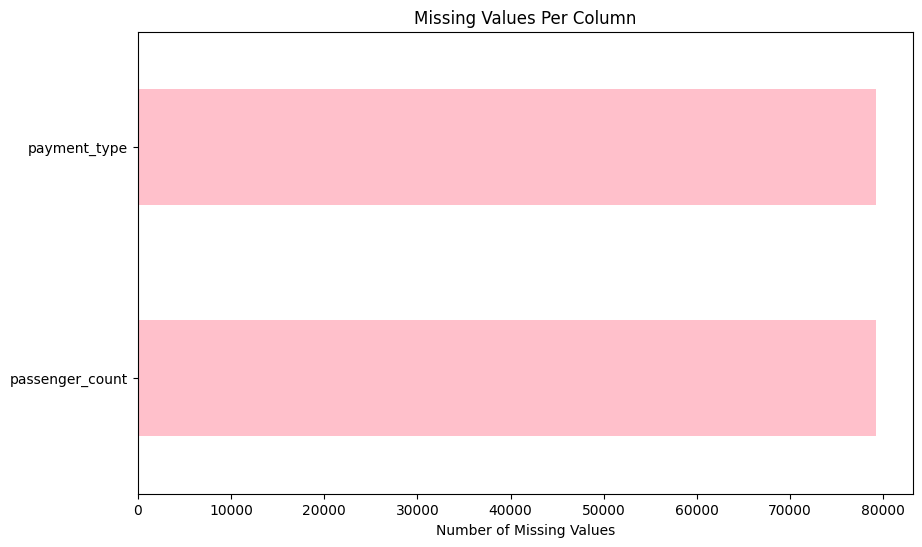

In [12]:
missing_counts = uber_df.isnull().sum().sort_values(ascending=False)
missing_counts = missing_counts[missing_counts > 0]  # Only show missing columns
missing_counts.plot(kind='barh', figsize=(10, 6), color='pink')
plt.xlabel("Number of Missing Values")
plt.title("Missing Values Per Column")
plt.show()


In [13]:
# Calculate the percentage of missing values
missing_values_percentage = (missing_values_count / len(uber_df)) * 100

# Convert into a DataFrame for better readability
missing_values_df = pd.DataFrame({
    'Missing Values': missing_values_count,
    'Percentage (%)': missing_values_percentage
})

# Display the missing values DataFrame
print("Percentage of Missing Values Per Column:")
print(missing_values_df.sort_values(by='Percentage (%)', ascending=False))

Percentage of Missing Values Per Column:
                 Missing Values  Percentage (%)
passenger_count           79229            1.22
payment_type              79229            1.22


**Findings: No columns should be dropped since the missing percentage is less than 50**

In [14]:
# Fill missing values for passenger_count and payment_type correctly
uber_df.loc[:, 'passenger_count'] = uber_df['passenger_count'].fillna(int(round(uber_df['passenger_count'].mean())))
uber_df.loc[:, 'payment_type'] = uber_df['payment_type'].fillna(7).astype(int)


In [15]:
print(uber_df.isnull().sum())

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
gst                      0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
dtype: int64


In [16]:
#handling duplicate records
print("Duplicates before removal:", uber_df.duplicated().sum())
uber_df.drop_duplicates(inplace=True)
print("Duplicates after removal:", uber_df.duplicated().sum())

Duplicates before removal: 12949
Duplicates after removal: 0


In [17]:
print(f"Data shape after cleaning: {uber_df.shape}")


Data shape after cleaning: (6487021, 16)



# **`Creating New Columns`**

In [18]:
# Create Hour and Day of the Week columns
uber_df['pickup_day'] = uber_df['tpep_pickup_datetime'].dt.dayofweek
uber_df['pickup_hour'] = uber_df['tpep_pickup_datetime'].dt.hour
# Check unique days
print(uber_df['pickup_day'].value_counts())
print(uber_df['pickup_hour'].value_counts())

pickup_day
4    1125582
3    1109597
2    1053664
5     894851
1     848092
0     739927
6     715308
Name: count, dtype: int64
pickup_hour
18    437403
17    400247
19    395530
15    376298
14    368043
16    358266
12    353241
21    351453
20    351224
13    347024
11    324338
9     312168
22    312040
10    309934
8     307112
7     240800
23    232203
0     179531
1     130726
6     126248
2      96072
3      68642
5      56900
4      51578
Name: count, dtype: int64


In [19]:
# Create trip duration in minutes
uber_df['trip_duration_min'] = (uber_df['tpep_dropoff_datetime'] - uber_df['tpep_pickup_datetime']).dt.total_seconds() / 60
print(uber_df[['trip_duration_min']].head())  # Verify if the new column is created properly

   trip_duration_min
0               4.80
1               7.42
2               6.18
3               4.85
4               2.30


In [20]:
# Remove rows with zero or negative duration or distance
uber_df = uber_df[(uber_df['trip_duration_min'] > 0) & (uber_df['trip_distance'] > 0)]


# **`Outliers`**

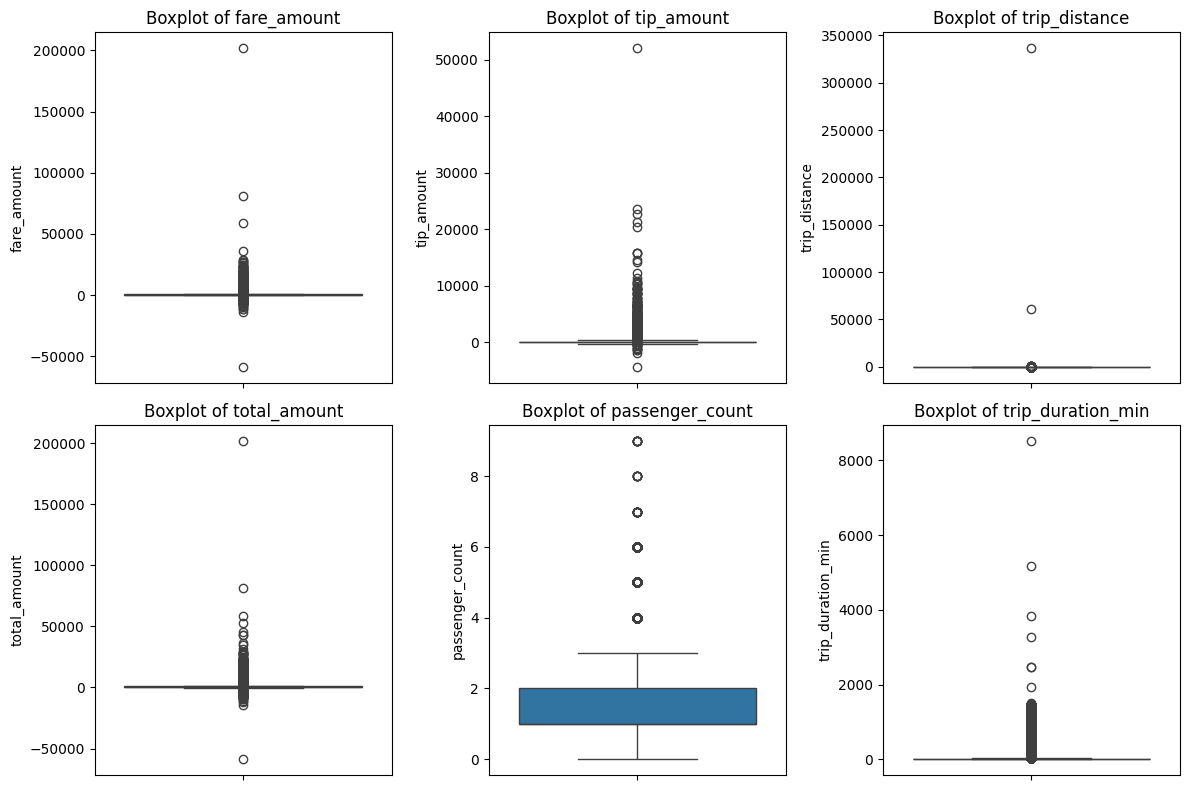

In [21]:
# Plotting boxplots for potential outlier columns
columns_to_check = ['fare_amount', 'tip_amount', 'trip_distance', 'total_amount', 'passenger_count', 'trip_duration_min']

plt.figure(figsize=(12, 8))
for i, col in enumerate(columns_to_check, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=uber_df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


**Fare Amount**:Significant outliers present, with extreme values above ₹200,000 and some negative fares, indicating possible data entry errors.

**Tip Amount:**
High number of outliers with unusually high tips above ₹50,000, which seems unrealistic.


**Trip Distance:** Extreme outliers with distances exceeding 300,000 km, suggesting data inconsistencies or recording errors.

**Total Amount:** Significant outliers present with extreme values above ₹200,000 and negative amounts, indicating possible errors or incorrect entries.

**Passenger Count:** Outliers detected with passenger counts exceeding 6, which is unusual, suggesting possible data entry errors.

**Trip Duration (Minutes):** Extreme outliers with durations exceeding 8,000 minutes, indicating potential anomalies in trip duration records.


## **Handling Outliers**

In [22]:
# Updated list of relevant columns to handle outliers
columns_to_handle = ['trip_distance', 'fare_amount', 'total_amount',
                     'trip_duration_min', 'tip_amount', 'tolls_amount']

# Corrected function to handle outliers using .loc[]
def handle_outliers(df, column):
    Q1, Q3 = df[column].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Use .loc to prevent SettingWithCopyWarning
    df.loc[:, column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    return df



# Check data shape after handling outliers
uber_df.shape


(6408264, 19)

In [23]:
#loading additional data
additional_data = 'https://docs.google.com/spreadsheets/d/1IiRJK-efAN5QKtTenlctBPPs61TPJUo5NeeY-4eTI4I/gviz/tq?tqx=out:csv'

location_df = pd.read_csv(additional_data)
print(location_df.head(10))


                        Bangalore Location  LocationID
0  Kempegowda International Airport (KIAL)         237
1       KSR Bengaluru City Railway Station         161
2               Majestic Bus Station (KBS)         236
3                               Whitefield         162
4                  Electronic City Phase I         186
5             Manyata Tech Park (Nagawara)         230
6                              Koramangala         132
7                             Marathahalli          48
8                              Indiranagar         170
9                                Bellandur         142


In [24]:
# Drop duplicate LocationID values before mapping
location_df = location_df.drop_duplicates(subset='LocationID', keep='first')

# Map correctly after dropping duplicates
uber_df.loc[:, 'Pickup_Location'] = uber_df['PULocationID'].map(
    location_df.set_index('LocationID')['Bangalore Location']
)

uber_df.loc[:, 'Dropoff_Location'] = uber_df['DOLocationID'].map(
    location_df.set_index('LocationID')['Bangalore Location']
)


In [25]:
# Check for missing values in PULocationID, DOLocationID, Dropoff_Location, Pickup_Location
print(uber_df[['PULocationID', 'DOLocationID']].isnull().sum())

print(uber_df[['Pickup_Location', 'Dropoff_Location']].isnull().sum())



PULocationID    0
DOLocationID    0
dtype: int64
Pickup_Location     339053
Dropoff_Location    322343
dtype: int64


In [26]:
#Handling missing values
uber_df['Pickup_Location'].fillna(uber_df['Pickup_Location'].mode()[0], inplace=True)
uber_df['Dropoff_Location'].fillna(uber_df['Dropoff_Location'].mode()[0], inplace=True)


<ipython-input-26-49a933cc1c77>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  uber_df['Pickup_Location'].fillna(uber_df['Pickup_Location'].mode()[0], inplace=True)
<ipython-input-26-49a933cc1c77>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].m

In [27]:
payment_category_mapping = {
    0: 'Unknown',
    1: 'UPI',
    2: 'Cash',
    3: 'Credit/Debit card',
    4: 'Uber Money',
    5: 'Voided trip',
    6: 'Dispute',
    7: 'Unknown'}

uber_df.loc[:, 'payment_type_category'] = uber_df['payment_type'].map(payment_category_mapping)



In [28]:
# Replace NaN values in payment_type with 7 to categorize them as 'Unknown'
uber_df['payment_type'] = uber_df['payment_type'].fillna(7).astype(int)

# Apply the mapping to create a new column with payment type categories
uber_df['payment_type_category'] = uber_df['payment_type'].map(payment_category_mapping)

# Display sample rows to confirm the mapping
print(uber_df[['payment_type', 'payment_type_category']].tail())


         payment_type payment_type_category
6499995             1                   UPI
6499996             1                   UPI
6499997             1                   UPI
6499998             2                  Cash
6499999             1                   UPI


In [29]:
# Check if any unmapped values exist after mapping
unmapped_values = uber_df[uber_df['payment_type_category'].isnull()]['payment_type'].unique()
print("Unmapped payment types:", unmapped_values)



Unmapped payment types: []


In [30]:
# Print payment_category_mapping to verify
print(payment_category_mapping)

# Check unique values to identify all mapped payment types
print(uber_df['payment_type'].unique())

# Confirm if all keys are correctly defined
print(uber_df['payment_type'].map(payment_category_mapping).unique())




{0: 'Unknown', 1: 'UPI', 2: 'Cash', 3: 'Credit/Debit card', 4: 'Uber Money', 5: 'Voided trip', 6: 'Dispute', 7: 'Unknown'}
[1 2 3 4 7]
['UPI' 'Cash' 'Credit/Debit card' 'Uber Money' 'Unknown']


In [31]:
# Check rows where payment_type is null or invalid
uber_df[uber_df['payment_type'].isnull()]



,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,extra,gst,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_day,pickup_hour,trip_duration_min,Pickup_Location,Dropoff_Location,payment_type_category


In [32]:
print(payment_category_mapping.get(1))
print(uber_df['payment_type'].value_counts())



UPI
payment_type
1    4710643
2    1590298
7      63971
3      27345
4      16007
Name: count, dtype: int64


In [33]:
# Check count for 'Dispute' category
dispute_count = (uber_df['payment_type_category'] == 'Dispute').sum()
print(f"Count of Dispute: {dispute_count}")


Count of Dispute: 0


In [34]:
uber_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6408264 entries, 0 to 6499999
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        Int64         
 4   trip_distance          float64       
 5   PULocationID           category      
 6   DOLocationID           category      
 7   payment_type           int64         
 8   fare_amount            float64       
 9   extra                  float64       
 10  gst                    float64       
 11  tip_amount             float64       
 12  tolls_amount           float64       
 13  improvement_surcharge  float64       
 14  total_amount           float64       
 15  congestion_surcharge   float64       
 16  pickup_day             int32         
 17  pickup_hour            int32         
 18  trip_duration_min      floa

# **Understanding demand patterns and its relationship with RDH.**

In [35]:
# Step 1: Calculate revenue per minute and RDH
uber_df['revenue_per_min'] = uber_df['total_amount'] / uber_df['trip_duration_min']
uber_df['RDH'] = uber_df['revenue_per_min'] * 60

# Step 2: Reset the index to remove gaps
uber_df.reset_index(drop=True, inplace=True)

# Step 3: Print the first 20 rows again
print(uber_df[['RDH']].head(10))



       RDH
0 6,661.62
1 4,705.32
2 4,955.68
3 4,773.65
4 3,506.31
5 2,952.21
6 2,614.45
7 2,799.86
8 5,940.64
9 2,822.59


# **Grouping Data to Analyze Demand Patterns Based On Hour And DaysOfWeek**

In [36]:
# Convert 'tpep_pickup_datetime' to datetime format
uber_df['tpep_pickup_datetime'] = pd.to_datetime(uber_df['tpep_pickup_datetime'])

# Extract hour, day, and month from pickup datetime
uber_df['hour'] = uber_df['tpep_pickup_datetime'].dt.hour
uber_df['day_of_week'] = uber_df['tpep_pickup_datetime'].dt.dayofweek
uber_df['month'] = uber_df['tpep_pickup_datetime'].dt.month

# Group by hour to analyze hourly demand
hourly_demand = uber_df.groupby('hour').size().reset_index(name='ride_count')

# Group by day of week to analyze weekly demand
daily_demand = uber_df.groupby('day_of_week').size().reset_index(name='ride_count')

# Group by month to analyze monthly demand
monthly_demand = uber_df.groupby('month').size().reset_index(name='ride_count')


# Calculate RDH per hour
rdh_hourly = uber_df.groupby('hour')['RDH'].mean().reset_index()

# Merge ride count with RDH data
rdh_hourly = rdh_hourly.merge(hourly_demand, on='hour', how='left')


# **Data Analysis**

**Hypothesis 1**: **Peak hours contribute significantly to RDH**

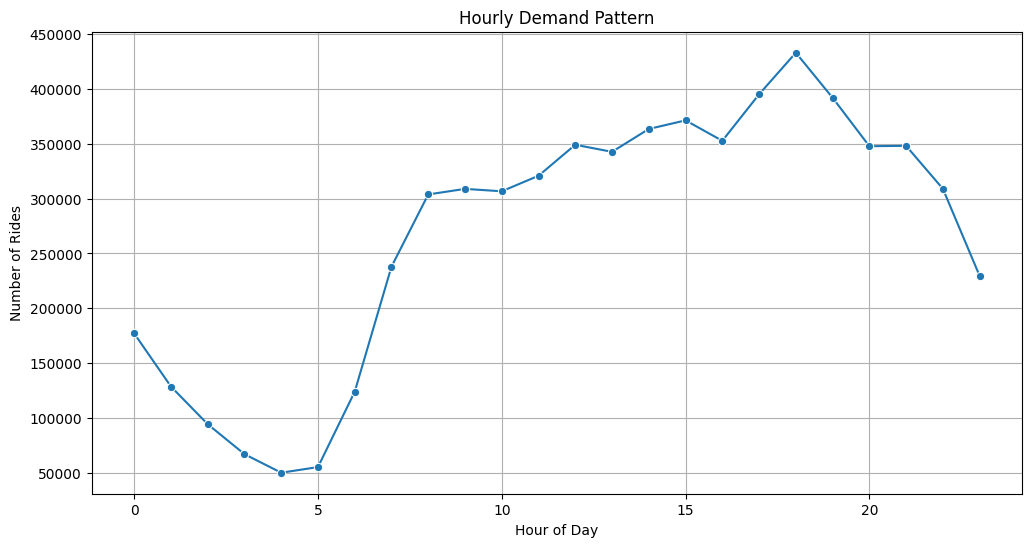

In [37]:
# Plotting houry demand pattern
plt.figure(figsize=(12, 6))
sns.lineplot(x='hour', y='ride_count', data=hourly_demand, marker='o')
plt.title('Hourly Demand Pattern')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Rides')
plt.grid()
plt.show()



🚗 Low Demand (12 AM - 5 AM): Minimal rides during early morning hours due to low activity.

📈 Steady Increase (6 AM - 9 AM): Sharp rise during morning rush hours as people commute.

⏸️ Stable Period (10 AM - 4 PM): Moderate demand during the day with slight fluctuations.

🔥 Peak Hours (5 PM - 8 PM): Highest demand during evening rush hours as people return home.

📉 Decline (9 PM onwards): Demand decreases gradually after 9 PM.

**Hypothesis Status** : **TRUE**. Peak hours (morning and evening) significantly contribute to higher ride demand, which directly affects **RDH**. Encouraging drivers to operate more during these peak hours with dynamic incentives can maximize their earnings.

**Hypothesis 2: Ride demand is higher on weekends (Friday-Sunday) due to increased leisure and social travel.**

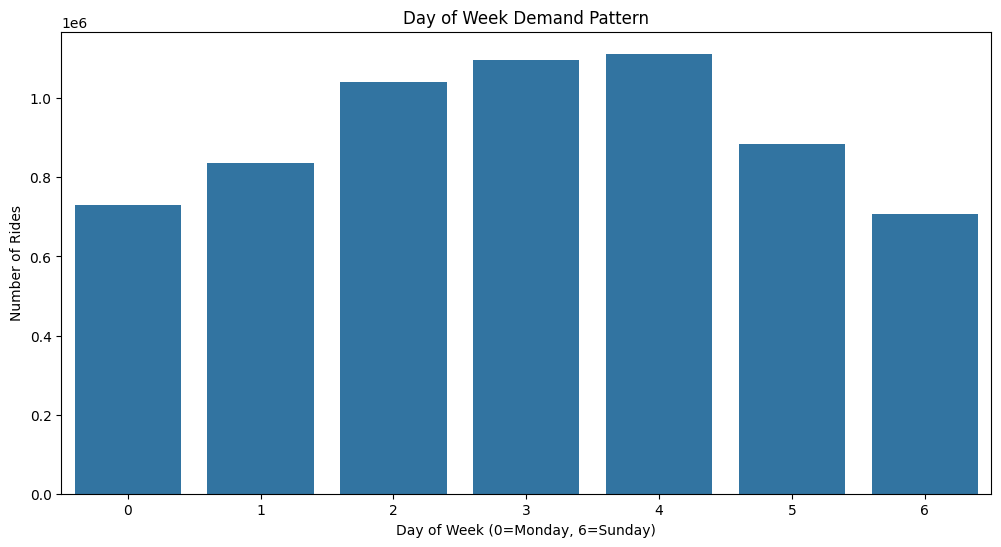

In [38]:
# Plot daily demand pattern
plt.figure(figsize=(12, 6))
sns.barplot(x='day_of_week', y='ride_count', data=daily_demand)
plt.title('Day of Week Demand Pattern')
plt.xlabel('Day of Week (0=Monday, 6=Sunday)')
plt.ylabel('Number of Rides')
plt.show()

📅 Peak Demand: Highest ride counts are recorded on **Friday(4)** likely due to increased end-of-week travel and social activities.🚀

📈The data reveals that ride demand peaks mid-week **Tuesday to Thursday** and gradually declines towards the **weekend**.This suggests that commuter and work-related rides contribute more to overall demand than leisure travel.

**Hypothesis Status**:Partially **FALSE**.

 **Hypothesis 3: RDH spikes during peak hours due to high demand and surge pricing, while off-peak hours see lower earnings.**

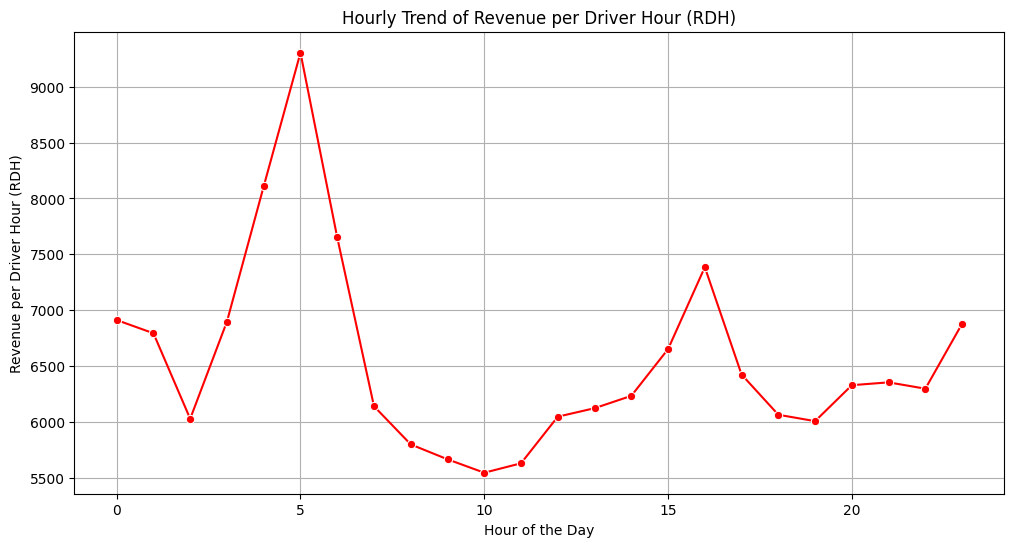

In [39]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='hour', y='RDH', data=rdh_hourly, marker='o', color='red')
plt.title('Hourly Trend of Revenue per Driver Hour (RDH)')
plt.xlabel('Hour of the Day')
plt.ylabel('Revenue per Driver Hour (RDH)')
plt.grid()
plt.show()


* RDH peaks sharply between **4-5 AM**, indicating high demand with fewer drivers available, likely due to airport drop-offs, early commuters, or long-distance travelers.
* RDH drops significantly at **7-10 AM** after the peak as more drivers become available, balancing the supply-demand equation.
* A secondary rise occurs in the evening at **4-5 PM**, likely due to evening commuters, office pickups, and post-work travel.
* **Hypothesis Status** : **FALSE**, RDH does not peak during typical rush hours, indicating possible pricing inefficiencies or an oversupply of drivers.

 **Hypothesis 4: High-demand pickup zones generate higher Revenue per Driver Hour (RDH) due to frequent ride requests.**

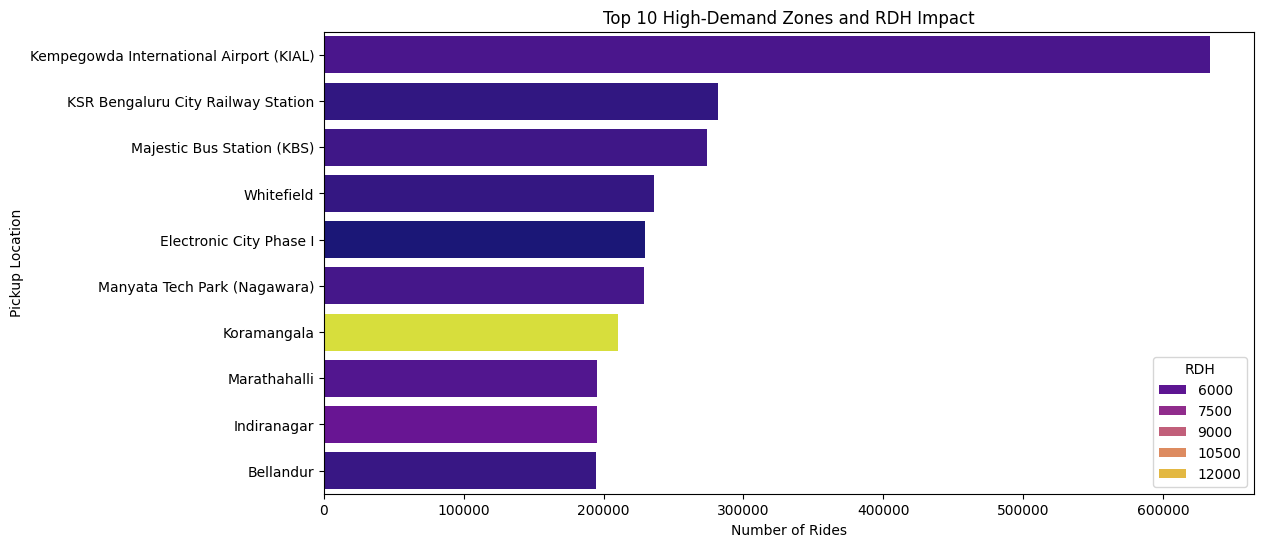

In [40]:
# Group by pickup location to identify high-demand zones
zone_demand = uber_df.groupby('Pickup_Location').size().reset_index(name='ride_count')

# Merge with average RDH per location
zone_rdh = uber_df.groupby('Pickup_Location')['RDH'].mean().reset_index()
zone_analysis = pd.merge(zone_demand, zone_rdh, on='Pickup_Location')

# Plot top 10 high-demand zones and RDH impact
top_zones = zone_analysis.sort_values(by='ride_count', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='ride_count', y='Pickup_Location', data=top_zones, hue='RDH', dodge=False , palette='plasma')
plt.title('Top 10 High-Demand Zones and RDH Impact')
plt.xlabel('Number of Rides')
plt.ylabel('Pickup Location')
plt.show()



* **Koramangala** offers the highest RDH, making it a lucrative zone for drivers despite lower ride counts.
* **Airport**, **railway**, and **tech zones** show high ride volume but moderate RDH, indicating frequent but shorter trips.
* **Hypothesis Status**: High-demand zones have higher RDH - **FALSE**

**Hypothesis 5: High-traffic areas (business hubs, transit points, and nightlife zones) dominate pickups and drop-offs, confirming demand concentration in key urban hotspots.**

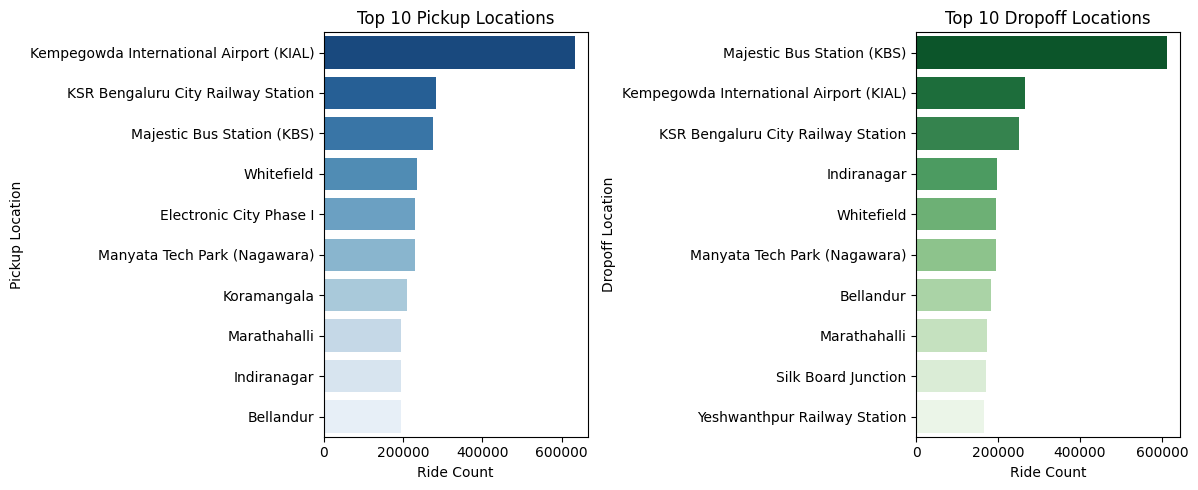

In [41]:
top_pickups = uber_df['Pickup_Location'].value_counts().head(10)
top_dropoffs = uber_df['Dropoff_Location'].value_counts().head(10)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.barplot(x=top_pickups.values, y=top_pickups.index, ax=ax[0], hue=top_pickups.index, legend=False, palette='Blues_r')
ax[0].set_title('Top 10 Pickup Locations')
ax[0].set_xlabel('Ride Count')
ax[0].set_ylabel('Pickup Location')

sns.barplot(x=top_dropoffs.values, y=top_dropoffs.index, ax=ax[1], hue=top_dropoffs.index, legend=False, palette='Greens_r')
ax[1].set_title('Top 10 Dropoff Locations')
ax[1].set_xlabel('Ride Count')
ax[1].set_ylabel('Dropoff Location')

plt.tight_layout()
plt.show()



* **Top pickup locations**: **Airport**, **railway stations**, and **key transit hubs** dominate, indicating high demand for intercity and long-distance travelers.
* **Top dropoff locations**: Major transit hubs and commercial areas, showing frequent one-way trips from travel points
* **Hypothesis Status**: **TRUE**.

**Hypothesis 6: Higher passenger count leads to increased average fare, as shared/group rides generate more revenue per trip.**

<ipython-input-42-b3e0254d4d9e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='passenger_count', y='total_amount', data=avg_fare_passenger, palette='coolwarm')


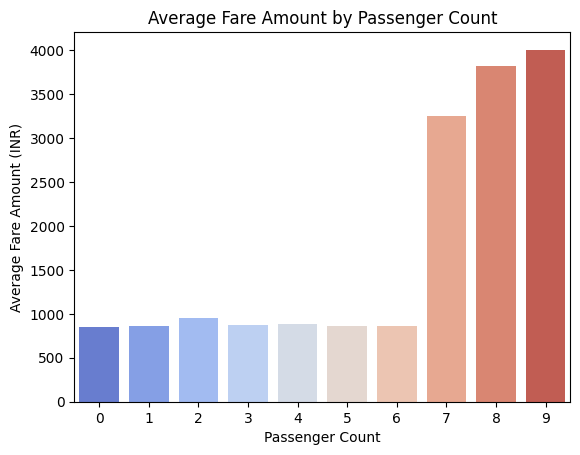

In [42]:
# Passenger Count Impact on Revenue
avg_fare_passenger = uber_df.groupby('passenger_count')['total_amount'].mean().reset_index()
sns.barplot(x='passenger_count', y='total_amount', data=avg_fare_passenger, palette='coolwarm')
plt.title('Average Fare Amount by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Average Fare Amount (INR)')
plt.show()



* Fare amount remains relatively constant for passenger counts between **0 and 6**, but significantly increases for **7-9** passengers.
* Larger group bookings drive higher fares, likely due to higher vehicle categories, surge pricing, or multi-passenger ride dynamics.
* **Hypothesis Status: TRUE**

**Hypothesis 7:Riders using digital payments (UPI, Credit/Debit Cards) tend to take longer or more expensive trips compared to cash users.**

<ipython-input-43-1b75e31182e4>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_counts.index, y=payment_counts.values, palette="plasma")


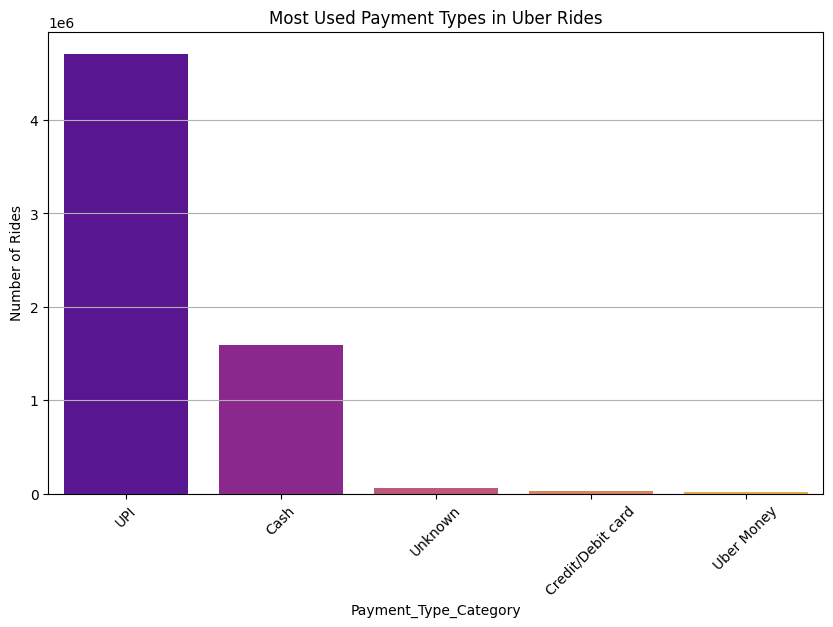

In [43]:
# Count occurrences of each payment type
payment_counts = uber_df['payment_type_category'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=payment_counts.index, y=payment_counts.values, palette="plasma")

# Formatting
plt.xlabel("Payment_Type_Category")
plt.ylabel("Number of Rides")
plt.title("Most Used Payment Types in Uber Rides")
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()

* **UPI** is the most used payment method, with significantly more rides than any other category indicating they take longer or more expensive rides.
* **Hypothesis Status**: **Partially True**, While digital payments can lead to longer or more expensive trips, the dominance of UPI over credit/debit cards contradicts this trend, as card usage is least preferred.

**Hypothesis 8: Digital payment users (UPI, Credit/Debit Card) generate higher RDH than cash users due to longer trips or tipping behavior.**

<ipython-input-44-1bc46386ec2e>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='payment_type_category', y='RDH', data=rdh_payment_analysis, palette='viridis')


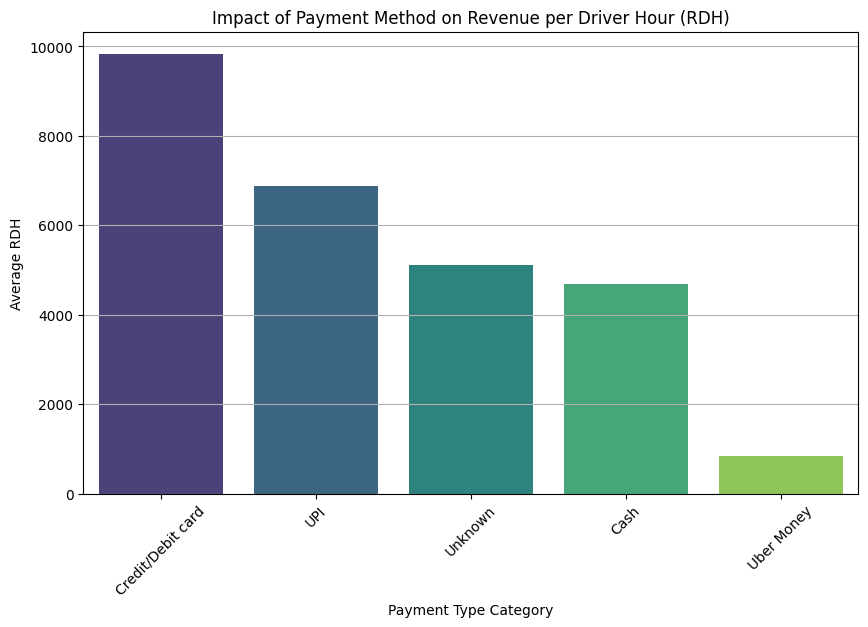

In [44]:
# Group by payment type category and calculate average RDH
rdh_payment_analysis = uber_df.groupby('payment_type_category')['RDH'].mean().reset_index()

# Sort values for better visualization
rdh_payment_analysis = rdh_payment_analysis.sort_values(by='RDH', ascending=False)

# Plot the findings
plt.figure(figsize=(10, 6))
sns.barplot(x='payment_type_category', y='RDH', data=rdh_payment_analysis, palette='viridis')

# Formatting
plt.xlabel("Payment Type Category")
plt.ylabel("Average RDH")
plt.title("Impact of Payment Method on Revenue per Driver Hour (RDH)")
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()


Riders using digital payments **(UPI or Credit/Debit Cards)** generate **higher RDH** due to longer trips, easier tipping, and higher fares, while cash users prefer shorter, cheaper rides with lower tipping.

**Hypothesis Status: TRUE**, Digital payment users (Credit/Debit Card, UPI) tend to generate higher RDH than cash users.

# **Overall Analysis**

**Peak Demand Trends**:

* Peak demand is observed during **morning** and **evening** rush hours, aligning with work commute times.

* **Airport** and **Railway Stations** have consistently high ride demand, but Revenue per Driver Hour (RDH) is not significantly higher due to potential supply surplus.

**Revenue Per Driver Hour (RDH) Trends**

* RDH fluctuates across different time slots, peaking during **late-night** and **early-morning** hours when fewer drivers are available.

* Digital payment users **(Credit/Debit cards, UPI)** contribute to higher **RDH**, possibly due to longer rides and tipping ease.

* **Cash payments** are linked to lower RDH, potentially indicating shorter trip distances and lower fare amounts.

**Impact of Payment Method on Revenue**

* **Credit/Debit Card** and **UPI** users generate higher RDH compared to cash users.

* Non-digital payment methods **(Cash)** are still widely used but are associated with lower-value rides.

* **Tipping** is more common with digital payments, contributing to overall higher earnings.

**Revenue Distribution by Zones:**

* **Kormangala**leads with the highest RDH despite not having the maximum ride count, indicating a higher revenue per trip.

* **Airport** and **Railway Station** show higher ride volumes but lower RDH, suggesting lower per-trip profitability.





# **Future Recommendations:**

**Dynamic Pricing Optimization**

* Increase surge pricing efficiency in high-demand zones like airports and railway stations to enhance RDH.

* Incentivize drivers to operate in high-RDH areas through targeted bonus structures.

**Encouraging Digital Payments**

* Promote cashless transactions through ride discounts or loyalty programs to maximize RDH.

* Ensure seamless payment processing to reduce transaction time and increase driver efficiency.

**Location-Based Strategy**

* Optimize ride pricing in premium residential and business areas to increase profitability.

* Implement targeted promotions in low-RDH areas to boost demand

**Customer Behavior Analysis**

* Use historical ride data to identify high-value customers and offer personalized discounts or incentives.

* Analyze trip frequency and distance patterns to tailor marketing strategies for different rider segments.

In [45]:
## Downloading the cleaaned dataset
##final_data = uber_df.drop(columns=['pickup_day', 'revenue_per_min'])
##display(final_data.head())

#downloading the dataset
##from google.colab import files

#Save the file locally in Colab
##final_data.to_csv('final_uber_data.csv', index=False)

#Download the file to your laptop
##files.download('final_uber_data.csv')